In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

In [2]:
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.facecolor': 'w'}
plt.rcParams.update(params)

In [3]:
cat = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/targets/dr9.0/1.1.1/resolve/dr9_lrg_1.1.1_basic.fits', columns=['RA', 'DEC', 'NOBS_G', 'NOBS_R', 'NOBS_Z', 'MASKBITS', 'PHOTSYS', 'TARGETID', 'DESI_TARGET']))
cat1 = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/targets/dr9.0/1.1.1/resolve/dr9_lrg_1.1.1_photom.fits', columns=['MORPHTYPE', 'EBV', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FIBERFLUX_Z', 'FLUX_IVAR_G', 'FLUX_IVAR_R', 'FLUX_IVAR_Z']))
cat2 = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/targets/dr9.0/1.1.1/resolve/dr9_lrg_1.1.1_sweep_1.fits', columns=['SHAPE_R', 'SHAPE_E1', 'SHAPE_E2']))
cat3 = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/targets/dr9.0/1.1.1/resolve/dr9_lrg_1.1.1_sweep_2.fits', columns=['PSFSIZE_G', 'PSFSIZE_R', 'PSFSIZE_Z']))
cat4 = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/targets/dr9.0/1.1.1/resolve/dr9_lrg_1.1.1_sweep_extra_1.fits', columns=['NEA_G', 'NEA_R', 'NEA_Z', 'BLOB_NEA_G', 'BLOB_NEA_R', 'BLOB_NEA_Z']))
cat = hstack([cat, cat1, cat2, cat3, cat4])
print(len(cat))

12338990


In [19]:
cat['gmag'] = 22.5 - 2.5*np.log10(np.clip(cat['FLUX_G']*10**(0.4*3.214*cat['EBV']), 1e-2, None))
cat['rmag'] = 22.5 - 2.5*np.log10(np.clip(cat['FLUX_R']*10**(0.4*2.165*cat['EBV']), 1e-2, None))
cat['zmag'] = 22.5 - 2.5*np.log10(np.clip(cat['FLUX_Z']*10**(0.4*1.211*cat['EBV']), 1e-2, None))
cat['zfibermag'] = 22.5 - 2.5*np.log10(np.clip(cat['FIBERFLUX_Z']*10**(0.4*1.211*cat['EBV']), 1e-2, None))
cat['gmagerr'] = 1/np.sqrt(cat['FLUX_IVAR_G'])/(cat['FLUX_G'])
cat['rmagerr'] = 1/np.sqrt(cat['FLUX_IVAR_R'])/(cat['FLUX_R'])
cat['zmagerr'] = 1/np.sqrt(cat['FLUX_IVAR_Z'])/(cat['FLUX_Z'])

/tmp/ipykernel_199646/2240266369.py:5: RuntimeWarning: divide by zero encountered in true_divide
  cat['gmagerr'] = 1/np.sqrt(cat['FLUX_IVAR_G'])/(cat['FLUX_G'])


In [20]:
print('South:')
mask_south = cat['PHOTSYS']=='S'
mask_south &= cat['DEC']>-20
tmp = Table()
tmp['type'], tmp['count'] = np.unique(cat['MORPHTYPE'][mask_south], return_counts=True)
tmp['frac (%)'] = tmp['count']/np.sum(mask_south)*100
tmp['frac (%)'].format = '%.1f'
tmp.sort('count')
tmp.pprint_all()
print()

print('North:')
mask_north = cat['PHOTSYS']=='N'
tmp = Table()
tmp['type'], tmp['count'] = np.unique(cat['MORPHTYPE'][mask_north], return_counts=True)
tmp['frac (%)'] = tmp['count']/np.sum(mask_north)*100
tmp['frac (%)'].format = '%.1f'
tmp.sort('count')
tmp.pprint_all()

South:
type  count  frac (%)
---- ------- --------
 PSF  330419      4.9
 EXP  703975     10.4
 SER  905004     13.4
 REX 2047243     30.3
 DEV 2765835     41.0

North:
type  count  frac (%)
---- ------- --------
 PSF  160958      5.0
 SER  307488      9.6
 EXP  343419     10.7
 REX 1044450     32.7
 DEV 1338640     41.9


In [21]:
print('South (faintest 10%):')
mask_south = cat['PHOTSYS']=='S'
mask_south &= cat['DEC']>-20
mask = mask_south & (cat['zfibermag']>np.percentile(cat['zfibermag'], 90))
tmp = Table()
tmp['type'], tmp['count'] = np.unique(cat['MORPHTYPE'][mask], return_counts=True)
tmp['frac (%)'] = tmp['count']/np.sum(mask)*100
tmp['frac (%)'].format = '%.1f'
tmp.sort('count')
tmp.pprint_all()
print()

print('North (faintest 10%):')
mask_north = cat['PHOTSYS']=='N'
mask = mask_north & (cat['zfibermag']>np.percentile(cat['zfibermag'], 90))
tmp = Table()
tmp['type'], tmp['count'] = np.unique(cat['MORPHTYPE'][mask], return_counts=True)
tmp['frac (%)'] = tmp['count']/np.sum(mask)*100
tmp['frac (%)'].format = '%.1f'
tmp.sort('count')
tmp.pprint_all()

South (faintest 10%):
type count  frac (%)
---- ------ --------
 SER   5678      0.9
 PSF  47453      7.1
 EXP  91488     13.7
 DEV 172490     25.9
 REX 349602     52.4

North (faintest 10%):
type count  frac (%)
---- ------ --------
 SER   1675      0.5
 PSF  27646      8.2
 EXP  48068     14.2
 DEV  77912     23.0
 REX 182907     54.1


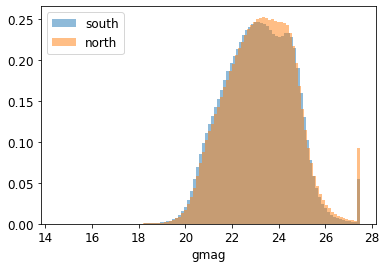

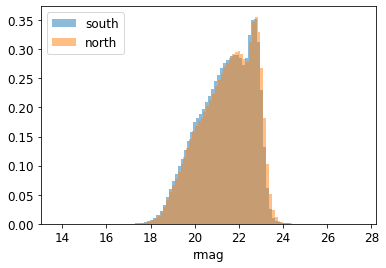

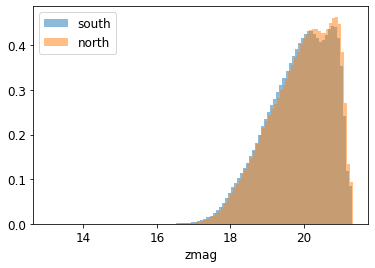

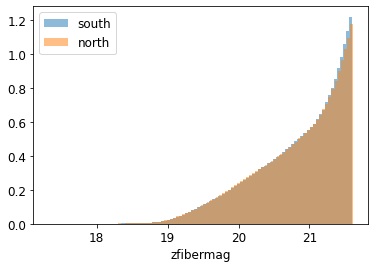

In [22]:
for col in ['gmag', 'rmag', 'zmag', 'zfibermag']:
    plt.hist(cat[col][mask_south], 100, alpha=0.5, label='south', density=True)
    plt.hist(cat[col][mask_north], 100, alpha=0.5, label='north', density=True)
    plt.xlabel(col)
    plt.legend(loc='upper left')
    plt.show()

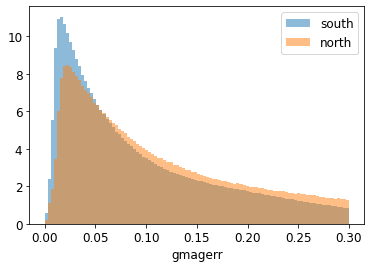

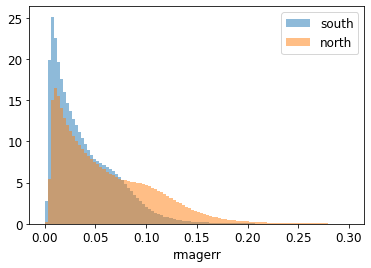

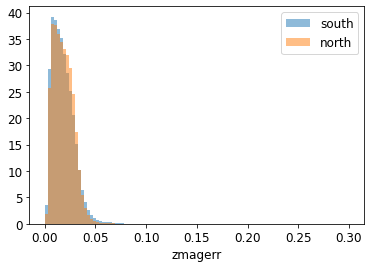

In [23]:
for col in ['gmag', 'rmag', 'zmag']:
    plt.hist(cat[col+'err'][mask_south], 100, alpha=0.5, range=(0, 0.3), label='south', density=True)
    plt.hist(cat[col+'err'][mask_north], 100, alpha=0.5, range=(0, 0.3), label='north', density=True)
    plt.xlabel(col+'err')
    plt.legend(loc='upper right')
    plt.show()

South:


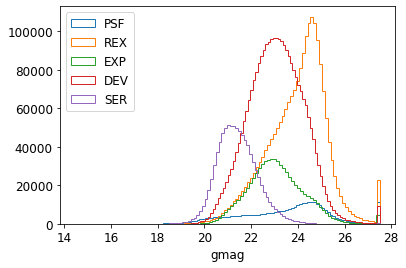

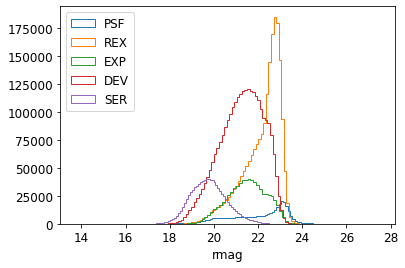

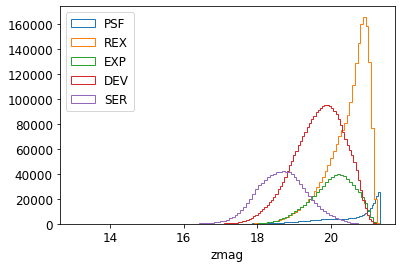

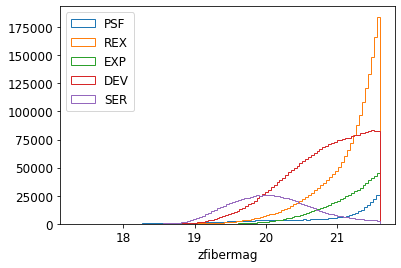

In [27]:
print('South:')
for col in ['gmag', 'rmag', 'zmag', 'zfibermag']:
    for tt in ['PSF', 'REX', 'EXP', 'DEV', 'SER']:
        mask = mask_south & (cat['MORPHTYPE']==tt)
        if np.sum(mask)>0:
            plt.hist(cat[col][mask], 100, alpha=1, label=tt, density=False, histtype='step')
    plt.xlabel(col)
    plt.legend(loc='upper left')
    plt.show()

North:


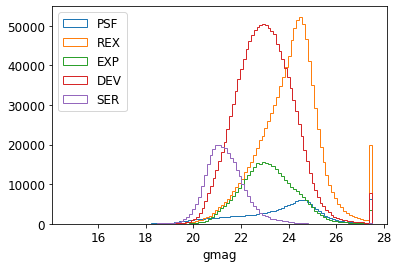

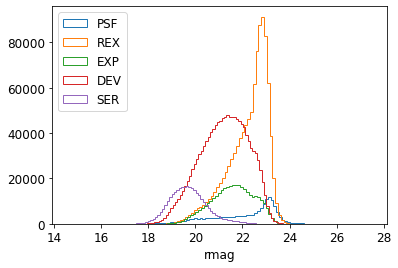

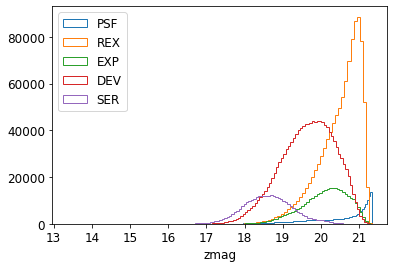

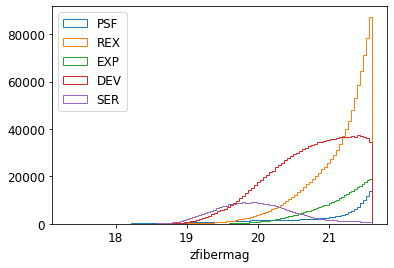

In [28]:
print('North:')
for col in ['gmag', 'rmag', 'zmag', 'zfibermag']:
    for tt in ['PSF', 'REX', 'EXP', 'DEV', 'SER']:
        mask = mask_north & (cat['MORPHTYPE']==tt)
        if np.sum(mask)>0:
            plt.hist(cat[col][mask], 100, alpha=1, label=tt, density=False, histtype='step')
    plt.xlabel(col)
    plt.legend(loc='upper left')
    plt.show()

0.40678465 0.01 10.0
0.9664066 0.01 13.8336
0.99596566 0.01 15.3008


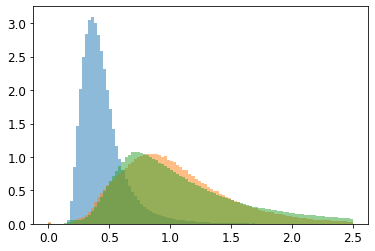

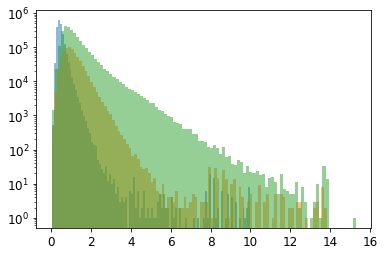

------------------------------------------------------
0.00552%
0.04489%
0.58500%


In [34]:
mask = mask_south & (cat['MORPHTYPE']=='REX')
print(np.median(cat['SHAPE_R'][mask]), np.min(cat['SHAPE_R'][mask]), np.max(cat['SHAPE_R'][mask]))
plt.hist(cat['SHAPE_R'][mask], 100, range=(0, 2.5), alpha=0.5, density=True)
mask = mask_south & (cat['MORPHTYPE']=='EXP')
print(np.median(cat['SHAPE_R'][mask]), np.min(cat['SHAPE_R'][mask]), np.max(cat['SHAPE_R'][mask]))
plt.hist(cat['SHAPE_R'][mask], 100, range=(0, 2.5), alpha=0.5, density=True)
mask = mask_south & (cat['MORPHTYPE']=='DEV')
print(np.median(cat['SHAPE_R'][mask]), np.min(cat['SHAPE_R'][mask]), np.max(cat['SHAPE_R'][mask]))
plt.hist(cat['SHAPE_R'][mask], 100, range=(0, 2.5), alpha=0.5, density=True)
plt.show()

mask = mask_south & (cat['MORPHTYPE']=='REX')
plt.hist(cat['SHAPE_R'][mask], 100, alpha=0.5, log=True)
mask = mask_south & (cat['MORPHTYPE']=='EXP')
plt.hist(cat['SHAPE_R'][mask], 100, alpha=0.5, log=True)
mask = mask_south & (cat['MORPHTYPE']=='DEV')
plt.hist(cat['SHAPE_R'][mask], 100, alpha=0.5, log=True)
plt.show()

print('------------------------------------------------------')

mask0 = mask_south & (cat['MORPHTYPE']=='REX')
mask = mask0 & (cat['SHAPE_R']>5)
print('{:.5f}%'.format(100*np.sum(mask)/np.sum(mask0)))

mask0 = mask_south & (cat['MORPHTYPE']=='EXP')
mask = mask0 & (cat['SHAPE_R']>5)
print('{:.5f}%'.format(100*np.sum(mask)/np.sum(mask0)))

mask0 = mask_south & (cat['MORPHTYPE']=='DEV')
mask = mask0 & (cat['SHAPE_R']>5)
print('{:.5f}%'.format(100*np.sum(mask)/np.sum(mask0)))

0.39107627 0.01 10.0
0.90848714 0.01 13.624
0.9398602 0.01 16.16577


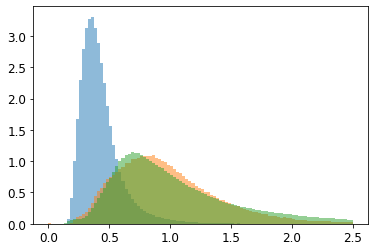

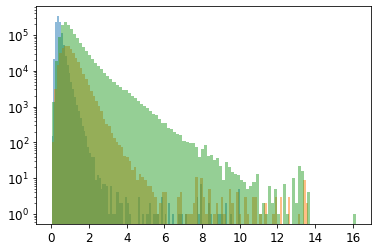

------------------------------------------------------
0.00412%
0.03815%
0.46121%


In [33]:
mask = mask_north & (cat['MORPHTYPE']=='REX')
print(np.median(cat['SHAPE_R'][mask]), np.min(cat['SHAPE_R'][mask]), np.max(cat['SHAPE_R'][mask]))
plt.hist(cat['SHAPE_R'][mask], 100, range=(0, 2.5), alpha=0.5, density=True)
mask = mask_north & (cat['MORPHTYPE']=='EXP')
print(np.median(cat['SHAPE_R'][mask]), np.min(cat['SHAPE_R'][mask]), np.max(cat['SHAPE_R'][mask]))
plt.hist(cat['SHAPE_R'][mask], 100, range=(0, 2.5), alpha=0.5, density=True)
mask = mask_north & (cat['MORPHTYPE']=='DEV')
print(np.median(cat['SHAPE_R'][mask]), np.min(cat['SHAPE_R'][mask]), np.max(cat['SHAPE_R'][mask]))
plt.hist(cat['SHAPE_R'][mask], 100, range=(0, 2.5), alpha=0.5, density=True)
plt.show()

mask = mask_north & (cat['MORPHTYPE']=='REX')
plt.hist(cat['SHAPE_R'][mask], 100, alpha=0.5, log=True)
mask = mask_north & (cat['MORPHTYPE']=='EXP')
plt.hist(cat['SHAPE_R'][mask], 100, alpha=0.5, log=True)
mask = mask_north & (cat['MORPHTYPE']=='DEV')
plt.hist(cat['SHAPE_R'][mask], 100, alpha=0.5, log=True)
plt.show()

print('------------------------------------------------------')

mask0 = mask_north & (cat['MORPHTYPE']=='REX')
mask = mask0 & (cat['SHAPE_R']>5)
print('{:.5f}%'.format(100*np.sum(mask)/np.sum(mask0)))

mask0 = mask_north & (cat['MORPHTYPE']=='EXP')
mask = mask0 & (cat['SHAPE_R']>5)
print('{:.5f}%'.format(100*np.sum(mask)/np.sum(mask0)))

mask0 = mask_north & (cat['MORPHTYPE']=='DEV')
mask = mask0 & (cat['SHAPE_R']>5)
print('{:.5f}%'.format(100*np.sum(mask)/np.sum(mask0)))

----------

In [73]:
mask = mask_south & (cat['MORPHTYPE']=='DEV')
np.random.seed(1232)
idx = np.sort(np.random.choice(np.where(mask)[0], size=int(1e5), replace=False))

10.421772


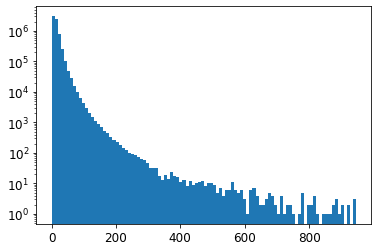

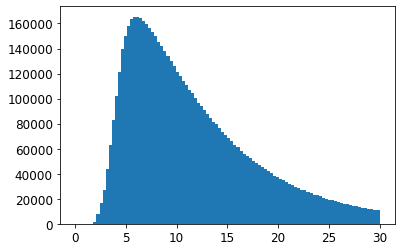

In [74]:
print(np.median(cat['NEA_Z'][mask_south]))

plt.hist(cat['NEA_Z'][mask_south & (cat['NEA_Z']>0) & (cat['NEA_Z']<1e3)], 100, log=True)
plt.show()

plt.hist(cat['NEA_Z'][mask_south & (cat['NEA_Z']>0) & (cat['NEA_Z']<1e3)], 100, range=(0, 30), log=False)
plt.show()

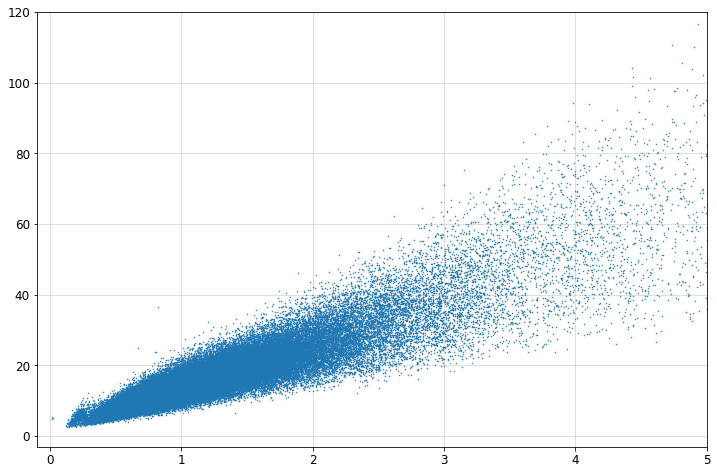

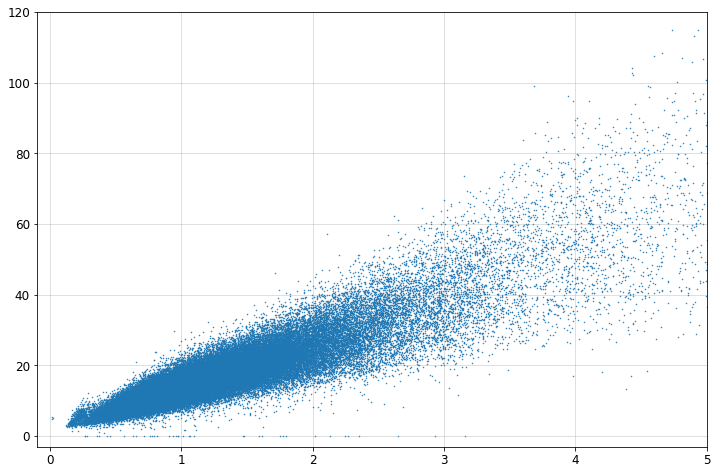

In [75]:
plt.figure(figsize=(12, 8))
plt.plot(cat['SHAPE_R'][idx], cat['NEA_Z'][idx], '.', ms=1)
plt.axis([-0.1, 5, -3, 120])
plt.grid(alpha=0.5)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(cat['SHAPE_R'][idx], cat['BLOB_NEA_Z'][idx], '.', ms=1)
plt.axis([-0.1, 5, -3, 120])
plt.grid(alpha=0.5)
plt.show()

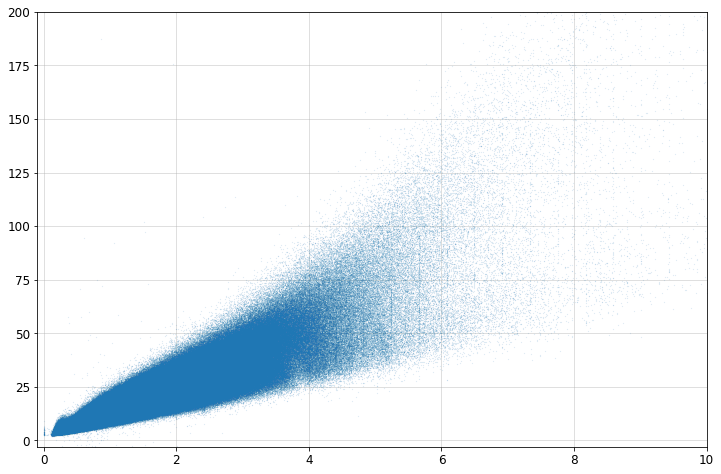

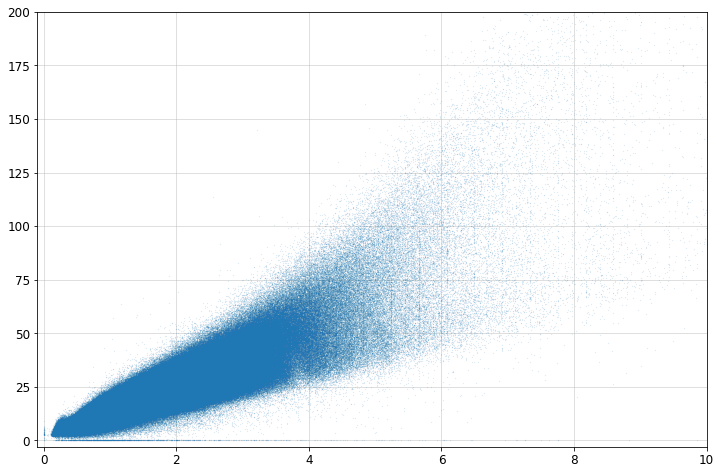

In [57]:
mask = cat['MORPHTYPE']=='DEV'
plt.figure(figsize=(12, 8))
plt.plot(cat['SHAPE_R'][mask], cat['NEA_Z'][mask], '.', ms=0.1)
plt.axis([-0.1, 10, -3, 200])
plt.grid(alpha=0.5)
plt.show()

mask = cat['MORPHTYPE']=='DEV'
plt.figure(figsize=(12, 8))
plt.plot(cat['SHAPE_R'][mask], cat['BLOB_NEA_Z'][mask], '.', ms=0.1)
plt.axis([-0.1, 10, -3, 200])
plt.grid(alpha=0.5)
plt.show()

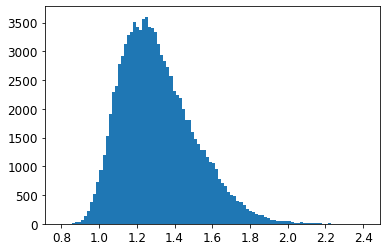

In [58]:
plt.hist(cat['PSFSIZE_Z'][idx], 100);

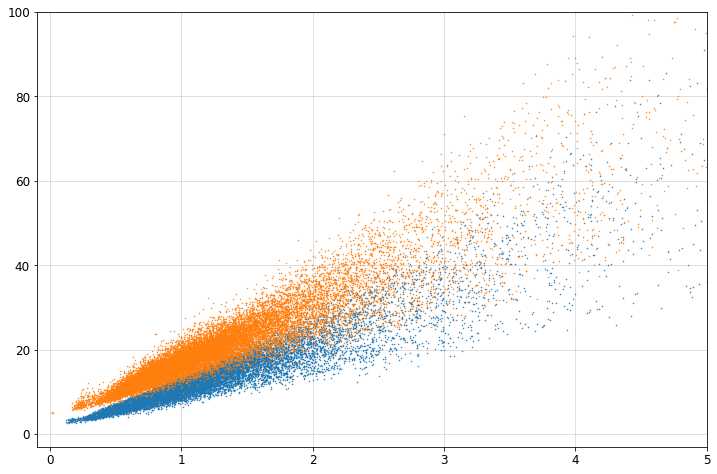

In [64]:
mask1 = cat['PSFSIZE_Z'][idx]<np.percentile(cat['PSFSIZE_Z'][idx], 20)
mask2 = cat['PSFSIZE_Z'][idx]>np.percentile(cat['PSFSIZE_Z'][idx], 80)

plt.figure(figsize=(12, 8))
plt.plot(cat['SHAPE_R'][idx[mask1]], cat['NEA_Z'][idx[mask1]], '.', ms=1)
plt.plot(cat['SHAPE_R'][idx[mask2]], cat['NEA_Z'][idx[mask2]], '.', ms=1)
plt.axis([-0.1, 5, -3, 120])
plt.grid(alpha=0.5)
plt.show()

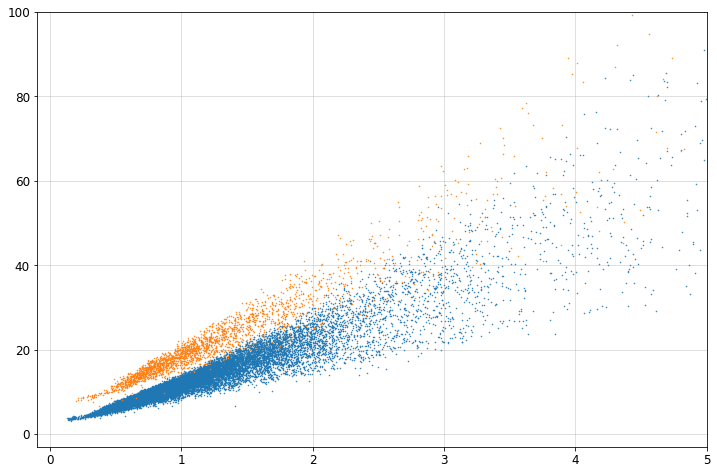

In [65]:
mask1 = (cat['PSFSIZE_Z'][idx]>1.1) & (cat['PSFSIZE_Z'][idx]<1.2)
mask2 = (cat['PSFSIZE_Z'][idx]>1.7) & (cat['PSFSIZE_Z'][idx]<1.8)

plt.figure(figsize=(12, 8))
plt.plot(cat['SHAPE_R'][idx[mask1]], cat['NEA_Z'][idx[mask1]], '.', ms=1)
plt.plot(cat['SHAPE_R'][idx[mask2]], cat['NEA_Z'][idx[mask2]], '.', ms=1)
plt.axis([-0.1, 5, -3, 120])
plt.grid(alpha=0.5)
plt.show()

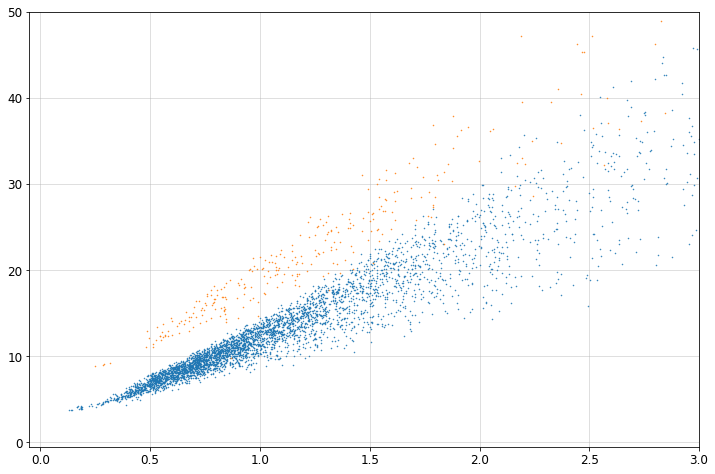

In [68]:
mask1 = (cat['PSFSIZE_Z'][idx]>1.18) & (cat['PSFSIZE_Z'][idx]<1.2)
mask2 = (cat['PSFSIZE_Z'][idx]>1.78) & (cat['PSFSIZE_Z'][idx]<1.8)

plt.figure(figsize=(12, 8))
plt.plot(cat['SHAPE_R'][idx[mask1]], cat['NEA_Z'][idx[mask1]], '.', ms=1)
plt.plot(cat['SHAPE_R'][idx[mask2]], cat['NEA_Z'][idx[mask2]], '.', ms=1)
plt.axis([-0.05, 3., -0.5, 50])
plt.grid(alpha=0.5)
plt.show()

--------

In [77]:
mask = mask_south & (cat['MORPHTYPE']=='DEV')
np.random.seed(1232)
idx = np.where(mask)[0]

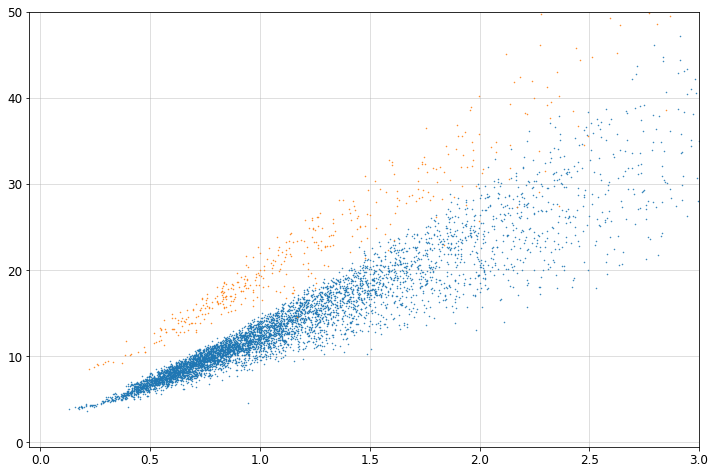

In [71]:
mask1 = (cat['PSFSIZE_Z'][idx]>1.199) & (cat['PSFSIZE_Z'][idx]<1.2)
mask2 = (cat['PSFSIZE_Z'][idx]>1.799) & (cat['PSFSIZE_Z'][idx]<1.8)

plt.figure(figsize=(12, 8))
plt.plot(cat['SHAPE_R'][idx[mask1]], cat['NEA_Z'][idx[mask1]], '.', ms=1)
plt.plot(cat['SHAPE_R'][idx[mask2]], cat['NEA_Z'][idx[mask2]], '.', ms=1)
plt.axis([-0.05, 3., -0.5, 50])
plt.grid(alpha=0.5)
plt.show()

-------

In [76]:
# axis ratio
e = np.array(np.sqrt(cat['SHAPE_E1']**2+cat['SHAPE_E2']**2))
cat['q'] = (1+e)/(1-e)

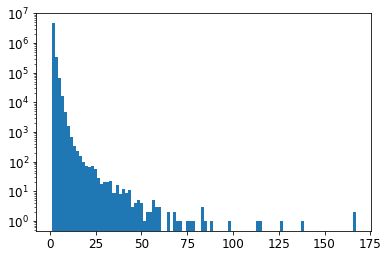

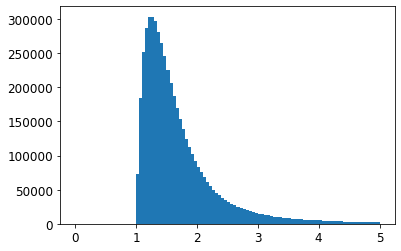

In [94]:
mask = cat['MORPHTYPE']=='DEV'

plt.hist(cat['q'][mask], 100, log=True)
plt.show()
plt.hist(cat['q'][mask], 100, range=(0, 5))
plt.show()

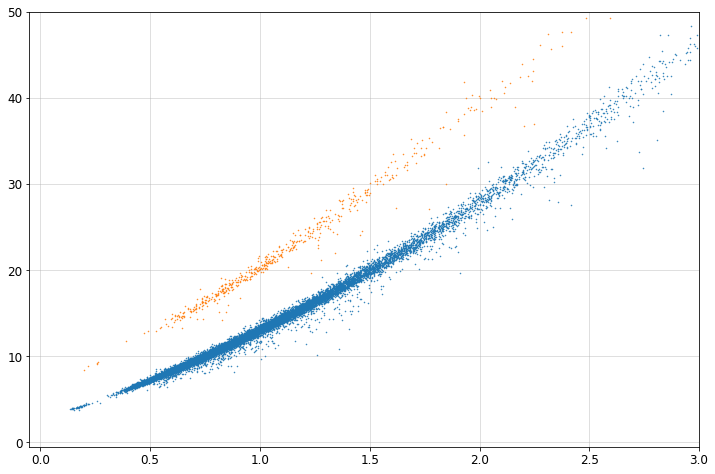

In [102]:
mask1 = (cat['PSFSIZE_Z']>1.19) & (cat['PSFSIZE_Z']<1.2)
mask1 &= (cat['MORPHTYPE']=='DEV') & (cat['q']>1.2) & (cat['q']<1.3)
mask2 = (cat['PSFSIZE_Z']>1.79) & (cat['PSFSIZE_Z']<1.8)
mask2 &= (cat['MORPHTYPE']=='DEV') & (cat['q']>1.2) & (cat['q']<1.3)

plt.figure(figsize=(12, 8))
plt.plot(cat['SHAPE_R'][mask1], cat['NEA_Z'][mask1], '.', ms=1)
plt.plot(cat['SHAPE_R'][mask2], cat['NEA_Z'][mask2], '.', ms=1)
plt.axis([-0.05, 3., -0.5, 50])
plt.grid(alpha=0.5)
plt.show()